# 一、神经网络简介

感知机中，确定权重的工作（即：确定合适的、能符合预期的输入与输出的权重，还是由人工进行的）。而神经网络的一个重要性质就是：能够自动地从数据中学习到合适的权重参数。

神经网络的示意图如下：

![image-20230310192938882](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230310192938882.png)

在该神经网络中，从左到右每一层依次编号0,1,2（从0开始编号，方便代码实现）。

为了简化感知机的公式表示，现在引入一个函数$h(x)$，其中$x=b+x_1w_1+x_2w_2$，所以感知机公式可以简化如下：

![image-20230310194123268](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230310194123268.png)

同时，如果把$b$也看成一个输入，那么感知机的示意图就变成如下：

![image-20230310214204807](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230310214204807.png)

所以，一个感知机的输入信号的总和就可以写成$a=b·1+x_1w_1+x_2w_2$，该总和再经过一个过程处理后，送入到输出端，而这个处理过程就是一个函数，被称为**激活函数**，感知机的激活函数就是$h(x)$。

整个过程表示如下：

![image-20230310214744957](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230310214744957.png)

`注：一般而言，“朴素感知机”是指单层网络，指的是激活函数使用了阶跃函数（超过一定阈值就切换输出的函数）的模型。“多层感知机”是指神经网络，即使用 sigmoid函数（后述）等平滑的激活函数的多层网络。`

# 二、激活函数

感知机中使用了阶跃函数作为激活函数。如果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了。下面我们就来介绍一下神经网络使用的激活函数。

## 2.1Sigmoid激活函数

Sigmoid激活函数公式如下：

![image-20230311212957752](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230311212957752.png)

Sigmoid激活函数实现：

In [16]:
import numpy as np


def sigmoid_function(x):
    y = 1/(1+np.exp(-x))
    return y


用程序画出Sigmoid函数的图像：

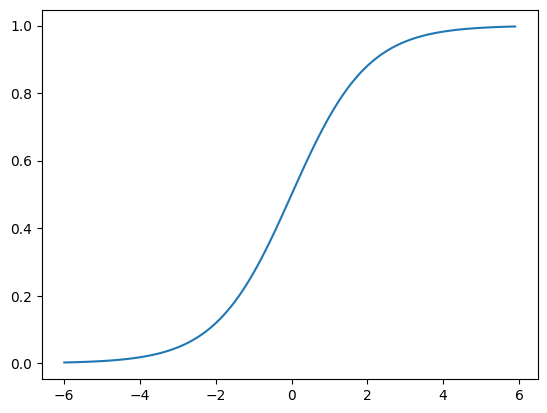

In [17]:
import matplotlib.pyplot as plt

x = np.arange(-6, 6, 0.1)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()


## 2.2阶跃激活函数

阶跃激活函数公式如下：

![image-20230310194123268](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230310194123268.png)

阶跃激活函数的实现：

In [18]:
# 输入为numpy数组的阶跃函数
import numpy as np


def step_function(x):  # x为numpy数组
    y = x > 0  # y为bool型数组
    return y.astype(int)  # 转换数据类型


下面用代码画出阶跃函数的图像：

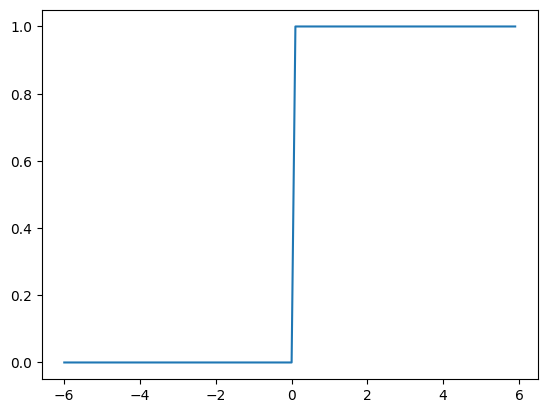

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6, 6, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.show()


## 2.3Sigmoid函数和阶跃函数的比较

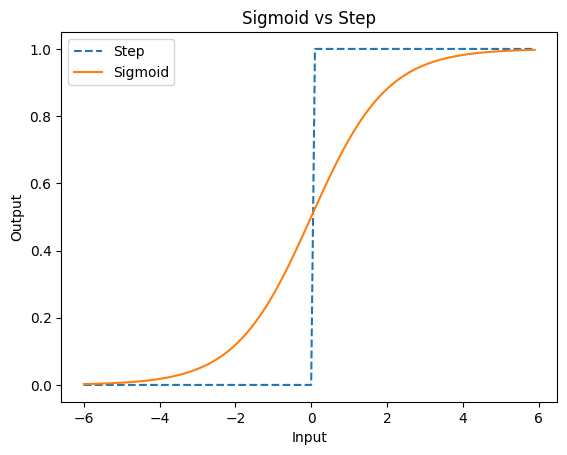

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6, 6, 0.1)
y1 = step_function(x)
y2 = sigmoid_function(x)

plt.plot(x, y1, label='Step', linestyle='--')
plt.plot(x, y2, label='Sigmoid')
plt.xlabel("Input")
plt.ylabel("Output")
plt.title('Sigmoid vs Step')
plt.legend()
plt.show()


- 不同点

    1. 平滑性不同。sigmoid函数是一条平滑的曲线，输出随着输入**发生连续性的变化**。而阶跃函数以0为界，输出**发生急剧性的变化**。sigmoid函数的平滑性对神经网络的学习具有重要意义。

    2. 阶跃函数只能返回0或1；sigmoid函数可以返回0.731 ...、0.880 ...等实数。即：**感知机中神经元之间流动的是0或1的二元信号**，而**神经网络中流动的是连续的实数值信号**。

- 共同点：

    1. 二者曲线的形状相似，都是**输入小时，输出接近于0；输入大时，输出接近于1**。即：`当输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值。`

    2. 不管输入信号有多小，或者有多大，输出信号的值都在0到1之间。


## 2.4非线性函数和线性函数

- 线性函数：$h(x)=cx$

- 非线性函数：线性函数以外的函数

所以，上述的两个激活函数都是非线性函数。实际上，对于神经网络来说，不可能使用线性函数作为激活函数，原因：如果使用线性函数，那么n次后的输出就是$c_nc_{n-1}...c_1x$，（$x$是初始输入），令$c_nc_{n-1}...c_1=a$，就可以概括成**一个**新激活函数，那么这样之前若干层激活函数实质上就只有一层，此时多层神经网络就变成一层神经网络（因为中间那么多层没有意义），由第一章可知，单层神经网络即单层感知机，是一个线性模型，无法解决异或问题

## 2.5Relu激活函数

公式如下：

![image-20230311224824063](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230311224824063.png)

程序实现如下：

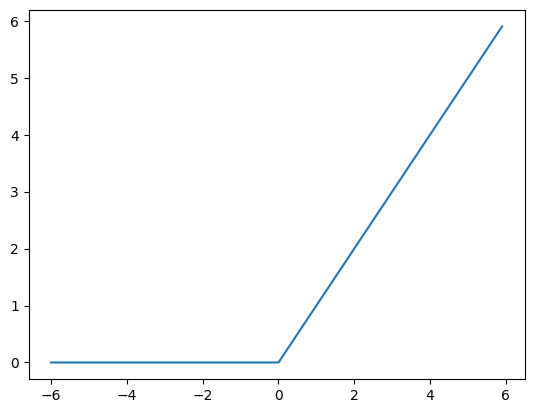

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def relu_funcrion(x):
    return np.maximum(0, x)


x = np.arange(-6, 6, 0.1)
y = relu_funcrion(x)

plt.plot(x, y)
plt.show()


## 2.6Tanh激活函数

公式如下：

![image-20230408195659833](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230408195659833.png)

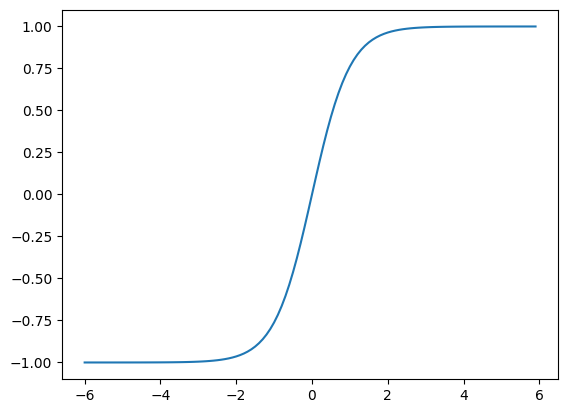

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))


x = np.arange(-6, 6, 0.1)
y = tanh(x)

plt.plot(x, y)
plt.show()

# 三、多维数组的运算

## 3.1多维数组的生成

生成一维数组：

In [23]:
import numpy as np

A = np.array([1, 2, 3, 4])

print(np.ndim(A))  # 数组的维数
print(np.shape(A))  # 数组的形状（返回值为元组）


1
(4,)


生成二维数组：

In [24]:
import numpy as np

B = np.array([[1, 2], [3, 4], [5, 6]])

print(np.ndim(B))
print(np.shape(B))


2
(3, 2)


## 3.2矩阵乘积

![image-20230312091729852](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312091729852.png)

使用numpy计算上述过程：

In [25]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])
print(np.dot(A, B))


[[19 22]
 [43 50]]


## 3.3神经网络的内积

下面图中的神经网络省略了偏置项和激活函数，只有权重：

![image-20230312092416623](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312092416623.png)

按照该图的神经网络，输入和输出满足如下公式：

$$
    \begin{cases}
    y_1=x_1w_1+x_2w_2\\
    y_2=x_1w_3+x_2w_4\\
    y_3=x_1w_5+x_2w_6
    \end{cases}
$$

运用线性代数知识，将该公式转为矩阵的乘法：

$$
    \left[
        \begin{matrix}
            w_1 &w_2\\
            w_3 &w_4\\
            w_5 &w_6
        \end{matrix}
    \right]
    ·
    \left[
        \begin{matrix}
            x_1\\
               \\
            x_2
        \end{matrix}
    \right]
    =
    \left[
        \begin{matrix}
            y_1\\
            y_2\\
            y_3
        \end{matrix}
    \right]
    \\或\\
    \left[
        \begin{matrix}
            x_1 &x_2
        \end{matrix}
    \right]    
    ·
    \left[
        \begin{matrix}
            w_1 &w_3 &w_5\\
            w_2 &w_4 &w_6
        \end{matrix}
    \right]
    =
    \left[
        \begin{matrix}
            y_1 &y_2 &y_3
        \end{matrix}
    \right]    
$$

与图中对应就用第二种。

即：神经网络的公式表示为：

$$
    X·W=Y
$$

这里面要注意的是，W的写法，作用在$x_1 x_2$上的权重是竖着写的，即W应该一列一列的看。

## 3.4三层神经网络实现

以下图中的神经网络为例，实现从输入到输出的（前向）处理。

![image-20230312100657785](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312100657785.png)

### 3.4.1相关符号

![image-20230312101646036](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312101646036.png)

从上图中可以看到权重和隐藏层的神经元的右上角有一个“(1)”，它表示权重和神经元的层号（即第1层的权重、第1层的神经元）。此外，权重的右下角有两个数字，它们是后一层的神经元和前一层的神经元的索引号。如果考虑偏置项就如下图所示：

![image-20230312104332979](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312104332979.png)

偏置的右下角的索引号只有一个。这是因为前一层的偏置神经元（神经元“1”）只有一个。
用矩阵乘法运算表示第一层的加权和表示为：

$$A^{(1)}=XW^{(1)}+B^{(1)}$$

![image-20230312110805352](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312110805352.png)

下面用代码实现这个三层网络：

In [26]:
import numpy as np

X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1)+B1


将上述的加权和，通过一个激活函数，示意图如下：

![image-20230312125542372](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312125542372.png)

这里使用sigmoid激活函数：

In [27]:
Z1 = sigmoid_function(A1)  # 第一层输出

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


接下来编写第二层，第二层为3输入2输出，所以输入矩阵形状为1×3，输出矩阵为1×2，权重矩阵为3×2

![image-20230312133625502](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312133625502.png)

In [28]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2)+B2
Z2 = sigmoid_function(A2)

print(A2)
print(Z2)


[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


最后一层网络2输入2输出，输入/输出矩阵为1×2，权重矩阵为2×2，加权和直接输出。输出层的激活函数用$σ()$表示，不同于隐藏层的激活函数$h()$。

![image-20230312133650502](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312133650502.png)

In [29]:
W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

Y = np.dot(Z2, W3)+B3
print(Y)


[0.31682708 0.69627909]


### 3.4.2代码小结

把之前的所有步骤都总结一下，权重用大写字母表示，偏置项和中间结果都用小写字母表示。

In [30]:
import numpy as np

# 初始化网络参数
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],
                              [0.2, 0.5],
                              [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],
                              [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

# 前向传播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 计算第一层
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid_function(a1)

    # 计算第二层
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid_function(a2)

    # 计算第三层
    a3 = np.dot(z2, W3)+b3
    y = a3

    return y


# 执行网络运算
network = init_network()
x = np.array([1, 0.5])
y = forward(network, x)
print(y)


[0.31682708 0.69627909]


结果与之前一致。

## 3.5输出层的设计

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。



### 3.5.1恒等函数和softmax函数

- 恒等函数会将输入按原样输出，对于输入的信息，不加以任何改动地直接输出。

![image-20230312161434280](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312161434280.png)

- softmax函数可以用下面的式子表示

![image-20230312161525102](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230312161525102.png)

观察上式可以发现：其实就是对每个输入数据先取一次$exp$，然后将各自的结果求比例。

![image-20230313095435611](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230313095435611.png)

**问：既然最后是求比例，为什么不直接求比例，非要先取一次$exp$？**

**答：因为这样可以使大的更大，小的更小，使输出结果两级分化，数据之间区别更明显，输出值大的最后得分更高，更有利于模型的学习。**

**比如，输出1，2，3，4四个数，直接占比为0.1，0.2，0.3，0.4；但是经过softmax之后，输出变为0.03，0.08，0.23，0.64（近似）。**

softmax函数实现：

In [31]:
def softmax_function(x):
    tmp = np.exp(x)
    denominator = np.sum(tmp)  # 求分母
    y = tmp/denominator

    return y


# 测试
print(softmax_function([0.3, 2.9, 4.0]))


[0.01821127 0.24519181 0.73659691]


### 3.5.2softmax函数的改进

【问题】：如果一个网络中输出层输入数据$a_k=100$，会计算$e^{100}$，直接导致数据溢出。

【解决】：所以在计算过程中要避免直接计算这种极大的数值，像如下方式改进：

![image-20230313100841562](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230313100841562.png)

也就是说，**在$exp$里面，上下任意加上同一个常数，最后的计算结果和原来一样**。这里的$C'$可以使用任何值，但是为了防止溢出，一般会使用**输入信号中的最大值**。

代码编写如下：

In [32]:
def softmax(a):
    C = np.max(a)  # 先找到最大的那个
    tmp = np.exp(a-C)
    y = tmp/np.sum(tmp)

    return y


# 测试
print(softmax([1010, 1000, 990]))


[9.99954600e-01 4.53978686e-05 2.06106005e-09]


### 3.5.3softmax函数的特性

经过softmax函数后的输出向量中，所有元素之和为1，例如：



In [33]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
print(np.sum(y))


[0.01821127 0.24519181 0.73659691]
1.0


正因为每个元素的大小都在0~1之间，所以也可以把输出的结果称为**概率**。可以解释成y[0]的概率是0.018（1.8%），y[1]的概率是0.245（24.5%），y[2]的概率是0.737（73.7%）。

在分类问题中，按照上述的结果，y[2]的概率最大，所以可以判断该结果为第2类。也就是说，通过**使用softmax函数，我们可以用概率的（统计的）方法处理问题**。

需要注意的是，即便使用了softmax函数，**各个元素之间的大小关系也不会改变**。比如，a的最大值是第2个元素，y的最大值也仍是第2个元素。

一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。并且，即便使用softmax函数，输出值最大的神经元的位置也不会变。因此，神经网络在进行分类时，输出层的softmax函数可以省略。在实际的问题中，由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax函数一般会被省略。



### 3.5.4输出层神经元的数量

输出的神经元数量表示了分类的类别数。比如，对一张图像中的数字进行识别，数字一共有10类（0~9），所以最后输出层应该有10个神经元。



## 3.6手写数字识别

前向传播（推理阶段）：即网络参数都已学习完毕，输入数据并从网络输入层到输出层计算出对应输出，对输出数据（概率）大小进行排序，得出预测结果。


### 3.6.1MNIST数据集

MNIST数据集是由0到9的数字图像构成的（图3-24）。训练图像有6万张，测试图像有1万张，这些图像可以用于学习和推理。MNIST数据集的一般使用方法是，先用训练图像进行学习，再用学习到的模型度量能在多大程度上对测试图像进行正确的分类。

![image-20230313185401788](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230313185401788.png)

- MNIST数据集的特点：

    1. 28×28像素的灰度图

    2. 每个图像数据都相应地标有“7”“2”“1”等标签。

- 如何使用MNIST数据集？

    1. 去图灵网（ http://www.ituring.com.cn/book/1921 ）下载本书配套的代码（点击右侧【随书下载字样】）。

    2. 下载完后，解压刚刚下载的zip文件，解压完成后里面包含如下图的这些文件夹，把这些文件夹的上一级目录复制到你自己创建的文件夹中，并改成英文名。

        ![image-20230409112026051](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230409112026051.png)

        复制完成后如下图，我把复制完的文件夹改名成Demo，刚刚下载的配套代码全部放在Demo文件夹里：

        ![image-20230409111945227](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230409111945227.png)

        ![image-20230409111916350](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230409111916350.png)

    3. 用编译器打开工作文件夹（就是你存放所有与该项目有关的文件的文件夹），我这里是DeepLearningNoob，里面包含刚刚下载的源码Demo文件夹，以及一些的记笔记用的jupyter notebook文件。

        ![image-20230409112646588](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230409112646588.png)

    4. 到这一步，基本的文件夹结构就已经弄好了，现在看一下如何在程序里使用Demo文件夹里刚刚下载的那些py文件。
        
        这就要解释一下python中的sys和os两个模块了。

        从外部import模块的时候，首先要让python知道你要导入的模块在什么位置（即这些模块在哪个文件夹里），而这些“位置”是保存在sys.path这个系统变量里的（sys.path是一个list，因此也支持append操作）。打印sys.path看一下这个list里面包含什么内容：

        ```py
        import sys,os

        print(sys.path)
        ```

        ![image-20230409114328516](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/image-20230409114328516.png)

        在import某个模块的时候，python会到sys.path的路径中找导入的模块，找到了就直接使用。对于外部模块（比如Demo/dataset/mnist.py）可以看到路径是不在sys.path中的，所以此时就要把Demo路径添加到sys.path中。

        如何获取Demo的路径呢？

        如果是Demo文件夹里的py文件，就在文件开头添加如下：

        ```py
        import sys,os

        current_file_dir = os.path.dirname(__file__)   # 获取当前文件所在目录
        os.chdir(current_file_dir)  # 更改工作空间路径
        sys.path.append(os.path.abspath(os.pardir))  # 添加路径
        ```

        如果是DeepLearningNoob文件夹下的ipynb文件中的代码块，就在代码块中添加如下：

        ```py
        import sys,os

        current_file_path = os.path.dirname(os.path.realpath('__file__')) # 获取ipynb文件的路径
        Demo_path = os.path.join(current_file_path, 'Demo') # 组合成Demo文件夹所在路径
        sys.path.append(Demo_path) # 添加路径

        ```

### 3.6.2MNIST数据集的使用



#### 3.6.2.1导出数据

- load_mnist：以<b>（训练图像,训练标签），(测试图像,测试标签)</b>的形式返回读入的MNIST数据。

    - normalize：是否将输入图像正规化为0.0～1.0的值。如果将该参数设置为False，则输入图像的像素会保持原来的0～255。

    - one_hot_label：False时，只是像7、2这样简单保存正确解标签；True时，标签则保存为one-hot表示。one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组。

    - flatten：是否将图像展开为一维数组。即：如果将该参数设置为False，则输入图像为1 × 28 × 28的三维数组；若设置为True，则输入图像会保存为由784个元素构成的一维数组。

In [34]:
import sys,os

current_file_path = os.path.dirname(os.path.realpath('__file__')) # .\DeepLearningNoob\

Demo_path = os.path.join(current_file_path, 'Demo') # .\DeepLearningNoob\Demo
sys.path.append(Demo_path)

from dataset.mnist import load_mnist

# 导出数据
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

# 查看数据的shape
print(x_train.shape)  # 因为flatten是true，所以训练图像是60000张28×28=784的图像。
print(y_train.shape)  # 60000张图片对应60000个标签
print(x_test.shape)  # 10000张测试图像
print(y_test.shape)  # 10000张测试标签


(60000, 784)
(60000,)
(10000, 784)
(10000,)


#### 3.6.2.2显示图像

需要用到PIL（Python Image Library）

- Image.fromarray(np.uint8(img))

    - 从数据集读取到的图像数据是保存在array数组里的，但是这种形式的数据不能直接使用，需要转为image对象数据。


In [35]:
import numpy as np
from PIL import Image

img = x_train[0]  # 训练图像的第一张
label = y_train[0]  # 对应标签
print(label)
print(img.shape)

img = img.reshape(28, 28)
pil_img = Image.fromarray(np.uint8(img))  # array转image
pil_img.show()


5
(784,)


#### 3.6.2.3神经网络的前向传播

因为是对一张图片的结果进行识别，输入的对象是一张图片，在MNIST数据集里，其像素为28×28，像素总数为784，所以**输入的神经元个数为784**；要判断是哪个数字，所以类别分别是0~9这10个数字，所以<b>输出神经元个数为10</b>。这样，输入层和输出层的结构就确定好了。

接下来是隐藏层（中间层）。设置两个隐藏层，神经元个数分别是50和100。（50、100可以设置为其他任意值）。

- get_data()：在数据集中获取数据，返回**测试图像，测试标签**。

- init_network()：读入保存在pickle文件中的权重参数（pickle可以将程序运行中的对象保存为文件）。这个文件中以字典变量的形式保存了权重和偏置参数。

- predict(network,x)：搭建网络结构，并对输入数据进行计算，得出输出结果。

In [36]:
import numpy as np
import pickle

def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(
        normalize=True, flatten=True, one_hot_label=False)
    return x_test, y_test

def init_network():
    # 权重文件sample_weight.pkl在ch03里
    with open('./Demo/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        return network


def predict(network, x):
    # 获取权重即偏置项
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    # 搭建网络
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid_function(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid_function(a2)
    a3 = np.dot(z2, W3)+b3
    y = softmax(a3)

    return y


【题外话】：`with open as f`的用法

由于文件读写时都有可能产生`IOError`，一旦出错，后面的`f.close()`就不会调用。所以，为了保证无论是否出错都能正确地关闭文件，我们可以使用`try ... finally`来实现：

```py
try:
    f = open('/path/to/file', 'r')
    print(f.read())
finally:
    if f:
        f.close()
```

但是每次都这么写实在太繁琐，所以，Python引入了`with`语句来自动帮我们调用`close()`方法：

```py
with open('/path/to/file', 'r') as f:
    print(f.read())
```

这和前面的`try ... finally`是一样的，但是代码更佳简洁，并且不必调用`f.close()`方法。

对测试集用上面的网络进行预测：

In [44]:
x_test, y_test = get_data()  # 获取数据
network = init_network()  # 获取网络参数

x = np.array(x_test)  # 输入图像
label = np.array(y_test)  # 标签
predict_result = np.zeros(label.shape)  # 存放预测结果

# 神经网络计算
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 获取y中最大值对应的索引
    predict_result[i] = p

print(label)
print(len(predict_result))
print(np.sum(label == predict_result)/len(label))


(10000, 784)
[7 2 1 ... 4 5 6]
[7. 2. 1. ... 4. 5. 6.]
0.9352


#### 3.6.2.4 批处理

为了加快处理速度，可以一次性送入若干张图片进行计算，而不需要像上面那样一次送一张。

因为大多数处理数值计算的库都进行了能够高效处理大型数组运算的优化。

基于之前的代码，对其稍作修改：

In [41]:
x_test, y_test = get_data()  # 获取数据
network = init_network()  # 获取网络参数

batch_size = 100  # 一次送100个数据进入网络
accuraccy_cnt = 0

for i in range(0, len(x_test), batch_size):
    y_batch = predict(network, x_test[i:i+batch_size])
    p = np.argmax(y_batch, axis=1)
    accuraccy_cnt = accuraccy_cnt+np.sum(p == y_test[i:i+batch_size])

print(accuraccy_cnt/len(x_test))


0.9352


【题外话】：argmax()中的axis参数

![二维矩阵](https://zyc-learning-1309954661.cos.ap-nanjing.myqcloud.com/machine-learning-pic/2020081016403863.png)

In [39]:
x = np.array([[0.1, 0.8, 0.1],
              [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3],
              [0.8, 0.1, 0.1]])
print(np.argmax(x, axis=1))  # 沿着1轴的方向看（横着看）
print(np.argmax(x, axis=0))  # 沿着0轴的方向看（竖着看）


[1 2 1 0]
[3 0 1]
